--- 1. 원본 데이터 (스케일 차이 큼) ---
[[   25  3000]
 [   35  7000]
 [   45 12000]
 [   55  6000]]

--- 2. 표준화 결과 (평균 0, 분산 1) ---
[[-1.34164079 -1.2344268 ]
 [-0.4472136   0.        ]
 [ 0.4472136   1.5430335 ]
 [ 1.34164079 -0.3086067 ]]
변환 후 평균: [0. 0.]
변환 후 표준편차: [1. 1.]

--- 3. 정규화 결과 (범위 0~1) ---
[[0.         0.        ]
 [0.33333333 0.44444444]
 [0.66666667 1.        ]
 [1.         0.33333333]]
변환 후 최소값: [0. 0.]
변환 후 최대값: [1. 1.]


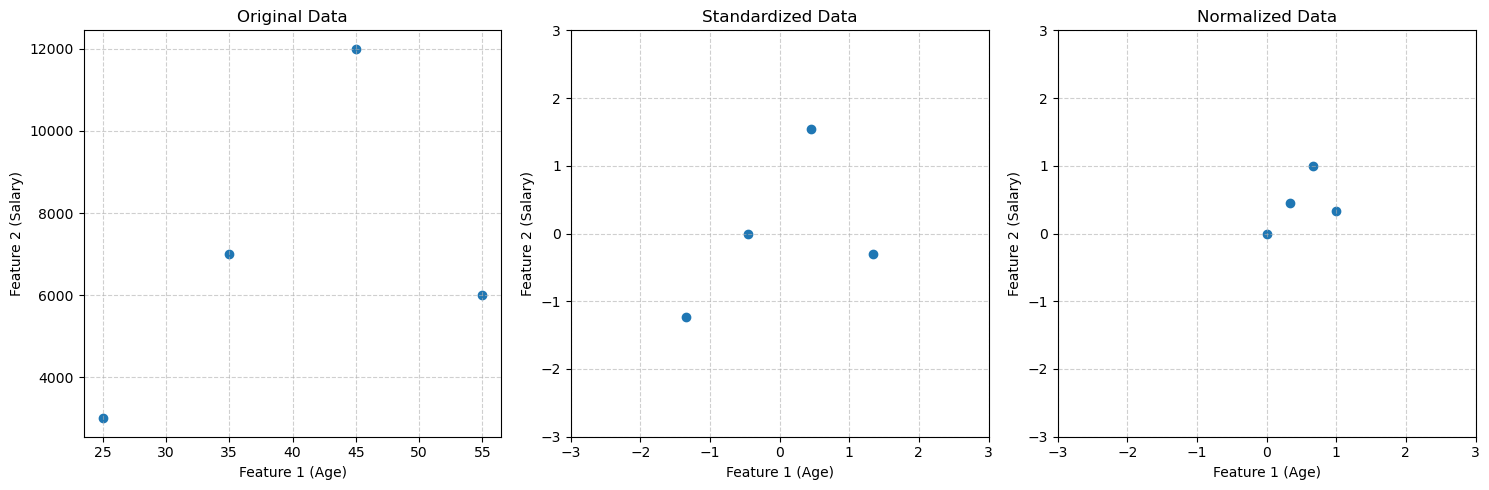

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 1. 예시 데이터 생성
# 데이터: '나이(Age)'와 '연봉(Salary)' (스케일 차이가 큼)
data = np.array([
    [25, 3000],  # 나이: 25, 연봉: 3천만
    [35, 7000],  # 나이: 35, 연봉: 7천만
    [45, 12000], # 나이: 45, 연봉: 1억 2천만
    [55, 6000],  # 나이: 55, 연봉: 6천만
])

print("--- 1. 원본 데이터 (스케일 차이 큼) ---")
print(data)

# 2. 표준화 (Standardization - StandardScaler)
# 평균을 0, 표준편차를 1로 조정
scaler_std = StandardScaler()
data_standardized = scaler_std.fit_transform(data)

print("\n--- 2. 표준화 결과 (평균 0, 분산 1) ---")
print(data_standardized)
print(f"변환 후 평균: {data_standardized.mean(axis=0).round(2)}")
print(f"변환 후 표준편차: {data_standardized.std(axis=0).round(2)}")


# 3. 정규화 (Normalization - MinMaxScaler)
# 데이터를 0과 1 사이의 값으로 조정
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

print("\n--- 3. 정규화 결과 (범위 0~1) ---")
print(data_normalized)
print(f"변환 후 최소값: {data_normalized.min(axis=0)}")
print(f"변환 후 최대값: {data_normalized.max(axis=0)}")


# 4. 시각화 비교 (2차원 평면에서의 데이터 분포)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original Data', 'Standardized Data', 'Normalized Data']
datasets = [data, data_standardized, data_normalized]

for i, (dataset, title) in enumerate(zip(datasets, titles)):
    ax[i].scatter(dataset[:, 0], dataset[:, 1])
    ax[i].set_title(title)
    ax[i].set_xlabel('Feature 1 (Age)')
    ax[i].set_ylabel('Feature 2 (Salary)')
    ax[i].grid(True, linestyle='--', alpha=0.6)
    
    # 스케일링된 데이터는 축 범위도 조정하여 보기 쉽게 설정
    if i > 0:
        ax[i].set_xlim(-3, 3)
        ax[i].set_ylim(-3, 3)

plt.tight_layout()
plt.show()